In [1]:
!python --version

Python 3.9.12


In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [3]:
!pip install pyarrow

In [4]:
# January
df_1 = pd.read_parquet("./data/green_tripdata_2021-01.parquet")
df_1.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2021-01-01 00:15:56,2021-01-01 00:19:52,N,1.0,43,151,1.0,1.01,5.5,0.5,0.5,0.00,0.0,None,0.3,6.80,2.0,1.0,0.00
1,2,2021-01-01 00:25:59,2021-01-01 00:34:44,N,1.0,166,239,1.0,2.53,10.0,0.5,0.5,2.81,0.0,None,0.3,16.86,1.0,1.0,2.75
2,2,2021-01-01 00:45:57,2021-01-01 00:51:55,N,1.0,41,42,1.0,1.12,6.0,0.5,0.5,1.00,0.0,None,0.3,8.30,1.0,1.0,0.00
3,2,2020-12-31 23:57:51,2021-01-01 00:04:56,N,1.0,168,75,1.0,1.99,8.0,0.5,0.5,0.00,0.0,None,0.3,9.30,2.0,1.0,0.00
4,2,2021-01-01 00:16:36,2021-01-01 00:16:40,N,2.0,265,265,3.0,0.00,-52.0,0.0,-0.5,0.00,0.0,None,-0.3,-52.80,3.0,1.0,0.00


In [5]:
# February
df_2 = pd.read_parquet("./data/green_tripdata_2021-02.parquet")
df_2.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2021-02-01 00:34:03,2021-02-01 00:51:58,N,1.0,130,205,5.0,3.66,14.0,0.5,0.5,10.00,0.0,None,0.3,25.30,1.0,1.0,0.00
1,2,2021-02-01 00:04:00,2021-02-01 00:10:30,N,1.0,152,244,1.0,1.10,6.5,0.5,0.5,0.00,0.0,None,0.3,7.80,2.0,1.0,0.00
2,2,2021-02-01 00:18:51,2021-02-01 00:34:06,N,1.0,152,48,1.0,4.93,16.5,0.5,0.5,0.00,0.0,None,0.3,20.55,2.0,1.0,2.75
3,2,2021-02-01 00:53:27,2021-02-01 01:11:41,N,1.0,152,241,1.0,6.70,21.0,0.5,0.5,0.00,0.0,None,0.3,22.30,2.0,1.0,0.00
4,2,2021-02-01 00:57:46,2021-02-01 01:06:44,N,1.0,75,42,1.0,1.89,8.5,0.5,0.5,2.45,0.0,None,0.3,12.25,1.0,1.0,0.00


In [6]:
# filter data by trip_type=2

# January:
df1 = df_1[df_1["trip_type"]==2]
# February
df2 = df_2[df_2["trip_type"]==2]

print(f"df1 shape: {df1.shape}")
print(f"df_1 shape: {df_1.shape}")
print("\n")
print(f"df2 shape: {df2.shape}")
print(f"df_2 shape: {df_2.shape}")

df1 shape: (1238, 20)
df_1 shape: (76518, 20)


df2 shape: (1091, 20)
df_2 shape: (64572, 20)


It means quite a number of samples were a street_hail trip type based on the dataset dictionary. Since we are focused on ordered rides, we'll be proceeding this way. 

In [7]:
#trip_duration

#January
df1.loc[:,"duration"] = df1.loc[:,"lpep_dropoff_datetime"] - df1.loc[:,"lpep_pickup_datetime"]
# February
df2.loc[:,"duration"] = df2.loc[:,"lpep_dropoff_datetime"] - df2.loc[:,"lpep_pickup_datetime"]

df1.head(2)

/tmp/ipykernel_29778/1792978592.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.loc[:,"duration"] = df1.loc[:,"lpep_dropoff_datetime"] - df1.loc[:,"lpep_pickup_datetime"]
/tmp/ipykernel_29778/1792978592.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.loc[:,"duration"] = df2.loc[:,"lpep_dropoff_datetime"] - df2.loc[:,"lpep_pickup_datetime"]


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,duration
6,2,2021-01-01 00:19:14,2021-01-01 00:19:21,N,5.0,265,265,1.0,0.0,180.0,...,0.0,36.06,0.0,None,0.3,216.36,1.0,2.0,0.0,0 days 00:00:07
15,2,2021-01-01 00:29:05,2021-01-01 00:29:07,N,5.0,42,264,1.0,0.0,10.0,...,0.0,2.06,0.0,None,0.3,12.36,1.0,2.0,0.0,0 days 00:00:02


In [8]:
df1 = df1.reset_index(drop=True)
df2 = df2.reset_index(drop=True)

In [9]:
df1.loc[0, "duration"].total_seconds()/60 # total seconds in a datetime col divided by 60 to get the minutes

0.11666666666666667

In [10]:
# apply to the dataframe
df1["duration"] = df1["duration"].apply(lambda x:x.total_seconds()/60)
df1.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,duration
0,2,2021-01-01 00:19:14,2021-01-01 00:19:21,N,5.0,265,265,1.0,0.00,180.0,...,0.0,36.06,0.0,None,0.3,216.36,1.0,2.0,0.0,0.116667
1,2,2021-01-01 00:29:05,2021-01-01 00:29:07,N,5.0,42,264,1.0,0.00,10.0,...,0.0,2.06,0.0,None,0.3,12.36,1.0,2.0,0.0,0.033333
2,2,2021-01-01 00:35:29,2021-01-01 00:55:15,N,5.0,74,247,1.0,3.64,13.0,...,0.0,0.00,0.0,None,0.3,13.30,2.0,2.0,0.0,19.766667
3,2,2021-01-01 23:12:41,2021-01-02 01:13:53,N,5.0,95,82,1.0,0.00,9.7,...,0.0,2.00,0.0,None,0.3,12.00,1.0,2.0,0.0,121.200000
4,2,2021-01-01 01:49:29,2021-01-01 01:49:33,N,5.0,244,244,5.0,0.02,12.0,...,0.0,2.46,0.0,None,0.3,14.76,1.0,2.0,0.0,0.066667


In [11]:
# apply to the dataframe
df2["duration"] = df2["duration"].apply(lambda x:x.total_seconds()/60)
df2.head(2)

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,duration
0,2,2021-02-01 00:33:03,2021-02-01 00:40:54,N,5.0,197,219,1.0,3.3,15.0,...,0.0,0.76,0.0,None,0.3,16.06,1.0,2.0,0.0,7.850000
1,2,2021-02-01 02:56:55,2021-02-01 02:58:38,N,5.0,78,78,1.0,0.0,24.0,...,0.0,0.00,0.0,None,0.3,24.30,2.0,2.0,0.0,1.716667


__The rest of the notebook uses just `df1` for experimentation__

/root/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='duration', ylabel='Density'>

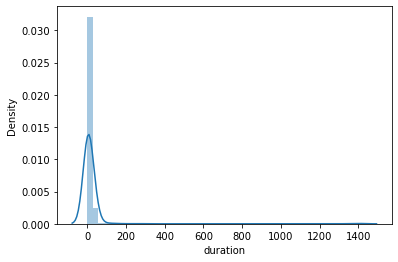

In [12]:
# check the ride time distribution
sns.distplot(df1["duration"])

In [13]:
df1["duration"].describe()

count    1238.000000
mean       18.305493
std       108.364382
min         0.000000
25%         0.100000
50%         1.666667
75%        14.216667
max      1416.100000
Name: duration, dtype: float64

On an average, rides have a duration of 18 mins. We explore


#### Percentiles:

Gives information on a values/scores that exist within a number of samples, in percentage. For example, what is the mean score for 25% of the entire data samples. In this case, for 25% of 1238 samples, which is about 310 rides, what is the mean ride duration? It tells us that its about a sec. We could deduce that 25% of rides did not hold. Maybe the passenger decided not to proceed. 

We could filter out this if we are not interested in those rides, or leave them as a type of occurance.

We can specify the percentile we would like to see, like 95%, so as to know the ride duration of such percentile. 

However, as an overall, the mean duration is 18 mins, while the median is 1.66 and the max is 1416 mins. This shows that most rides have a short duration. 

In [14]:
df1["duration"].describe(percentiles=[0.95, 0.98, 0.99])

count    1238.000000
mean       18.305493
std       108.364382
min         0.000000
50%         1.666667
95%        35.604167
98%        59.339333
99%       149.837833
max      1416.100000
Name: duration, dtype: float64

98% of the rides fall under ~an hour ride duration. 

- Two decisions:
1. Drop off samples with ride duration of 0 mins
2. Drop off samples with ride duration > 60 mins

In [17]:
df = df1.copy()
df = df[(df["duration"]>0)&(df["duration"]<=60)]
df.shape

(1209, 21)

In [18]:
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,duration
0,2,2021-01-01 00:19:14,2021-01-01 00:19:21,N,5.0,265,265,1.0,0.00,180.0,...,0.0,36.06,0.0,None,0.3,216.36,1.0,2.0,0.0,0.116667
1,2,2021-01-01 00:29:05,2021-01-01 00:29:07,N,5.0,42,264,1.0,0.00,10.0,...,0.0,2.06,0.0,None,0.3,12.36,1.0,2.0,0.0,0.033333
2,2,2021-01-01 00:35:29,2021-01-01 00:55:15,N,5.0,74,247,1.0,3.64,13.0,...,0.0,0.00,0.0,None,0.3,13.30,2.0,2.0,0.0,19.766667
4,2,2021-01-01 01:49:29,2021-01-01 01:49:33,N,5.0,244,244,5.0,0.02,12.0,...,0.0,2.46,0.0,None,0.3,14.76,1.0,2.0,0.0,0.066667
5,2,2021-01-01 01:54:51,2021-01-01 02:15:35,N,5.0,74,94,1.0,5.82,18.0,...,0.0,0.00,0.0,None,0.3,18.30,2.0,2.0,0.0,20.733333


In [20]:
df["duration"].describe()

count    1209.000000
mean        8.082382
std        11.215573
min         0.016667
25%         0.100000
50%         1.466667
75%        13.400000
max        58.966667
Name: duration, dtype: float64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1209 entries, 0 to 1237
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               1209 non-null   int64         
 1   lpep_pickup_datetime   1209 non-null   datetime64[ns]
 2   lpep_dropoff_datetime  1209 non-null   datetime64[ns]
 3   store_and_fwd_flag     1209 non-null   object        
 4   RatecodeID             1209 non-null   float64       
 5   PULocationID           1209 non-null   int64         
 6   DOLocationID           1209 non-null   int64         
 7   passenger_count        1209 non-null   float64       
 8   trip_distance          1209 non-null   float64       
 9   fare_amount            1209 non-null   float64       
 10  extra                  1209 non-null   float64       
 11  mta_tax                1209 non-null   float64       
 12  tip_amount             1209 non-null   float64       
 13  tol

In [22]:
df.describe()

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,duration
count,1209.000000,1209.000000,1209.00000,1209.000000,1209.000000,1209.000000,1209.000000,1209.000000,1209.000000,1209.00000,1209.000000,1209.000000,1209.000000,1209.000000,1209.0,1209.000000,1209.000000
mean,1.938792,4.953681,126.82134,152.641853,1.265509,1.993532,21.217510,0.000827,0.007444,1.07134,0.091811,0.274938,22.775327,1.417701,2.0,0.111456,8.082382
std,0.239810,0.428116,77.26620,85.486357,0.771905,3.606312,31.426455,0.028760,0.060578,2.78434,0.972797,0.094775,32.237948,0.562384,0.0,0.542517,11.215573
min,1.000000,1.000000,1.00000,1.000000,0.000000,0.000000,-280.000000,0.000000,0.000000,0.00000,0.000000,-0.300000,-280.300000,1.000000,2.0,0.000000,0.016667
25%,2.000000,5.000000,69.00000,74.000000,1.000000,0.000000,10.000000,0.000000,0.000000,0.00000,0.000000,0.300000,10.300000,1.000000,2.0,0.000000,0.100000
50%,2.000000,5.000000,97.00000,152.000000,1.000000,0.200000,14.000000,0.000000,0.000000,0.00000,0.000000,0.300000,15.300000,1.000000,2.0,0.000000,1.466667
75%,2.000000,5.000000,195.00000,243.000000,1.000000,2.700000,20.000000,0.000000,0.000000,1.00000,0.000000,0.300000,22.300000,2.000000,2.0,0.000000,13.400000
max,2.000000,5.000000,265.00000,265.000000,8.000000,36.410000,284.000000,1.000000,0.500000,38.00000,17.870000,0.300000,284.300000,4.000000,2.0,2.750000,58.966667


In [23]:
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,duration
0,2,2021-01-01 00:19:14,2021-01-01 00:19:21,N,5.0,265,265,1.0,0.00,180.0,...,0.0,36.06,0.0,None,0.3,216.36,1.0,2.0,0.0,0.116667
1,2,2021-01-01 00:29:05,2021-01-01 00:29:07,N,5.0,42,264,1.0,0.00,10.0,...,0.0,2.06,0.0,None,0.3,12.36,1.0,2.0,0.0,0.033333
2,2,2021-01-01 00:35:29,2021-01-01 00:55:15,N,5.0,74,247,1.0,3.64,13.0,...,0.0,0.00,0.0,None,0.3,13.30,2.0,2.0,0.0,19.766667
4,2,2021-01-01 01:49:29,2021-01-01 01:49:33,N,5.0,244,244,5.0,0.02,12.0,...,0.0,2.46,0.0,None,0.3,14.76,1.0,2.0,0.0,0.066667
5,2,2021-01-01 01:54:51,2021-01-01 02:15:35,N,5.0,74,94,1.0,5.82,18.0,...,0.0,0.00,0.0,None,0.3,18.30,2.0,2.0,0.0,20.733333


In [37]:
# use the pick up location, drop off location and trip distance to predict the ride duration

ml_df = df[["PULocationID", "DOLocationID", "trip_distance", "duration"]]
ml_df.isna().sum()

PULocationID     0
DOLocationID     0
trip_distance    0
duration         0
dtype: int64

### One Hot Encoding of Preprocessed DF

In [38]:
ohe = OneHotEncoder()
cat = ohe.fit_transform(ml_df[["PULocationID", "DOLocationID"]]).toarray()

In [39]:
col_names = ohe.get_feature_names_out(["PULocationID", "DOLocationID"])
print(col_names)

['PULocationID_1' 'PULocationID_7' 'PULocationID_8' 'PULocationID_10'
 'PULocationID_16' 'PULocationID_17' 'PULocationID_18' 'PULocationID_19'
 'PULocationID_20' 'PULocationID_24' 'PULocationID_25' 'PULocationID_26'
 'PULocationID_28' 'PULocationID_29' 'PULocationID_32' 'PULocationID_33'
 'PULocationID_37' 'PULocationID_38' 'PULocationID_39' 'PULocationID_40'
 'PULocationID_41' 'PULocationID_42' 'PULocationID_47' 'PULocationID_49'
 'PULocationID_51' 'PULocationID_53' 'PULocationID_54' 'PULocationID_56'
 'PULocationID_59' 'PULocationID_60' 'PULocationID_61' 'PULocationID_65'
 'PULocationID_69' 'PULocationID_70' 'PULocationID_72' 'PULocationID_73'
 'PULocationID_74' 'PULocationID_75' 'PULocationID_76' 'PULocationID_77'
 'PULocationID_78' 'PULocationID_80' 'PULocationID_81' 'PULocationID_82'
 'PULocationID_83' 'PULocationID_85' 'PULocationID_89' 'PULocationID_91'
 'PULocationID_92' 'PULocationID_93' 'PULocationID_94' 'PULocationID_95'
 'PULocationID_97' 'PULocationID_98' 'PULocationID_102

In [40]:
cat_df = pd.DataFrame(cat, columns=col_names)
cat_df.head()

,PULocationID_1,PULocationID_7,PULocationID_8,PULocationID_10,PULocationID_16,PULocationID_17,PULocationID_18,PULocationID_19,PULocationID_20,PULocationID_24,...,DOLocationID_254,DOLocationID_256,DOLocationID_257,DOLocationID_258,DOLocationID_259,DOLocationID_260,DOLocationID_262,DOLocationID_263,DOLocationID_264,DOLocationID_265
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
ml_df = pd.concat([cat_df, ml_df[["trip_distance", "duration"]]], axis=1)
ml_df.head()

,PULocationID_1,PULocationID_7,PULocationID_8,PULocationID_10,PULocationID_16,PULocationID_17,PULocationID_18,PULocationID_19,PULocationID_20,PULocationID_24,...,DOLocationID_257,DOLocationID_258,DOLocationID_259,DOLocationID_260,DOLocationID_262,DOLocationID_263,DOLocationID_264,DOLocationID_265,trip_distance,duration
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.00,0.116667
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.00,0.033333
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.64,19.766667
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.02,0.066667


In [42]:
ml_df.isna().sum()

PULocationID_1      29
PULocationID_7      29
PULocationID_8      29
PULocationID_10     29
PULocationID_16     29
                    ..
DOLocationID_263    29
DOLocationID_264    29
DOLocationID_265    29
trip_distance       29
duration            29
Length: 301, dtype: int64

In [43]:
ml_df.dropna(inplace=True)

In [44]:
ml_df.head()

,PULocationID_1,PULocationID_7,PULocationID_8,PULocationID_10,PULocationID_16,PULocationID_17,PULocationID_18,PULocationID_19,PULocationID_20,PULocationID_24,...,DOLocationID_257,DOLocationID_258,DOLocationID_259,DOLocationID_260,DOLocationID_262,DOLocationID_263,DOLocationID_264,DOLocationID_265,trip_distance,duration
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.00,0.116667
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.00,0.033333
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.64,19.766667
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.02,0.066667
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.82,20.733333


In [45]:
X = ml_df.loc[:,:"duration"]
y = ml_df.loc[:,"duration"]

### Model Building

In [47]:
lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

In [48]:
# predict on same train data to see how the model is fitting
y_pred = lr.predict(X)

In [53]:
y_pred

array([ 0.11666667,  0.03333333, 19.76666667, ..., 14.08333333,
        0.08333333,  0.06666667])

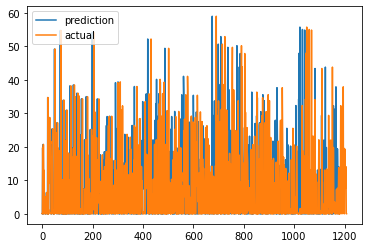

In [54]:
# comparison plot between actual and predicted (on train)
plt.plot(y_pred, label="prediction")
plt.plot(y, label="actual")
plt.legend()
plt.show()

The plot shows a well fitted learning. Let's check the RMSE value.

In [58]:
mean_squared_error(y_pred, y, squared=False)

1.005204483036099e-14

The error value on the train data is ~0